# training images pair
## There are 3 types of training pairs
### 1. mask other types and leave roads as conditions. (thi8 is more like inpainting)
### 2. mask other types and leave roads, but only keep road edges. (this is like canny edge but only keep road edges)
### 3. Any sketch to image, this is hard, probably need human provide?

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import numpy as np

1. roads only

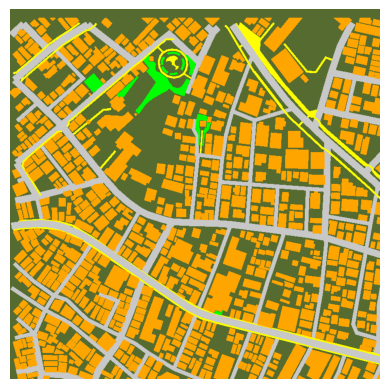

/tmp/ipykernel_2574427/737467831.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(image_path)


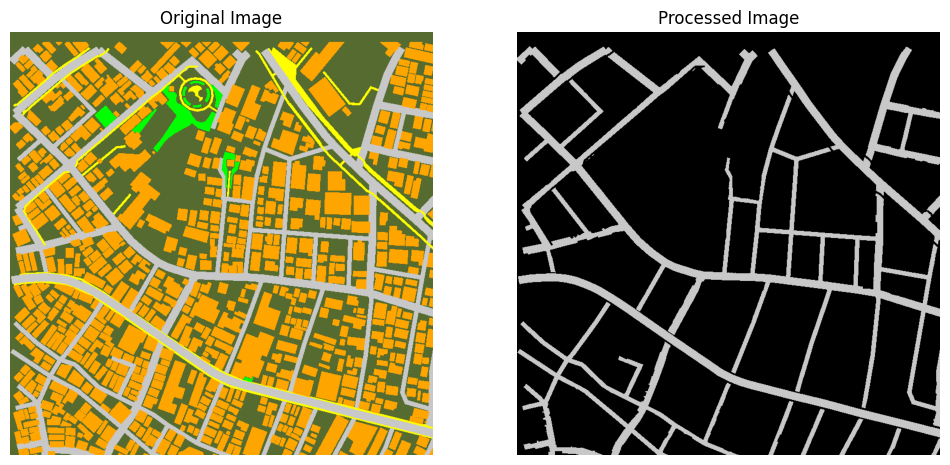

In [10]:
input_img_path = '/data/jd_data/data1/jd/osm_data_new/768/03_27/patch_size_768_overlap_ratio_0.3_building_threshold_0.1_water_threshold_0.5_rail_threshold_0.3/0001_processed_dence.png_patch_0_0.png'

# display input image
img = mpimg.imread(input_img_path)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

def process_image(image_path, target_rgb):
    # Load the image as a NumPy array
    img = imageio.imread(image_path)
    
    # Create a mask where all pixels equal to the target RGB are True
    mask = np.all(img == np.array(target_rgb), axis=-1)
    
    # Create a new image where only the matching pixels are retained,
    # and others are set to black
    new_img = np.zeros_like(img)
    new_img[mask] = img[mask]
    
    # Display the original and processed images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(new_img)
    plt.title('Processed Image')
    plt.axis('off')
    plt.show()

    imageio.imwrite("process1.png", new_img)

# Example usage:

target_rgb = (200, 200, 200)  # Replace x, y, z with your specific RGB values
process_image(input_img_path, target_rgb)






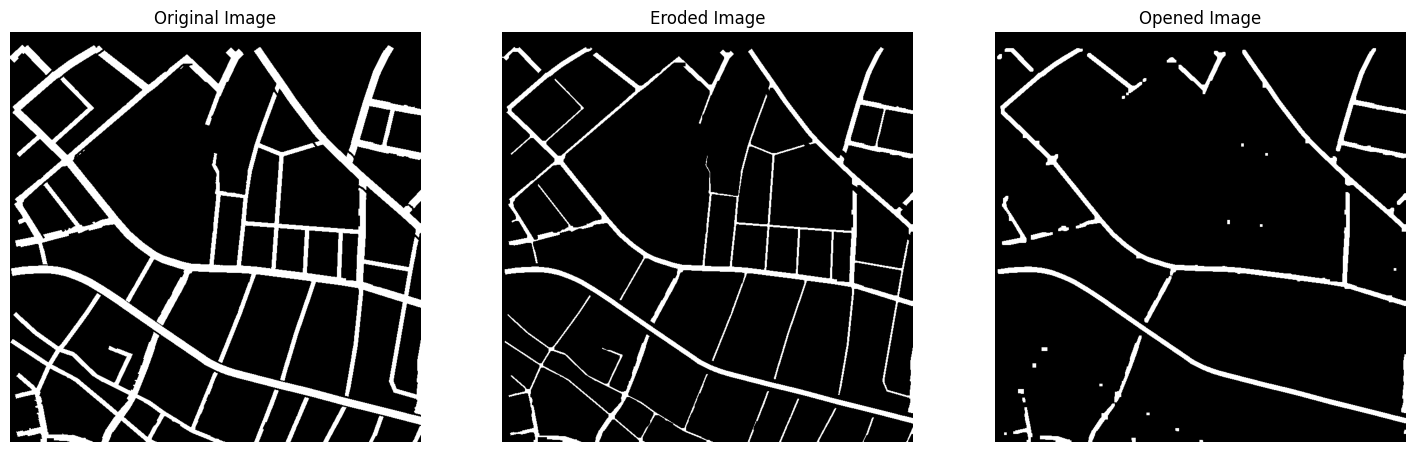

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_and_display_image(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Threshold the image to isolate lines
    _, thresholded = cv2.threshold(img, 199, 255, cv2.THRESH_BINARY)
    
    # Morphological operation: Erosion to thin the lines
    kernel = np.ones((5,5), np.uint8)  # You can adjust the kernel size
    eroded = cv2.erode(thresholded, kernel, iterations=1)
    
    # Optional: Opening to remove small fragments
    opened = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, kernel)
    
    # Display the original and processed images
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(eroded, cmap='gray')
    plt.title('Eroded Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(opened, cmap='gray')
    plt.title('Opened Image')
    plt.axis('off')
    
    plt.show()

# Example usage:
image_path = '/data/jd_data/fast-DiT/utils/process1.png'  # Replace with the path to your image
process_and_display_image(image_path)


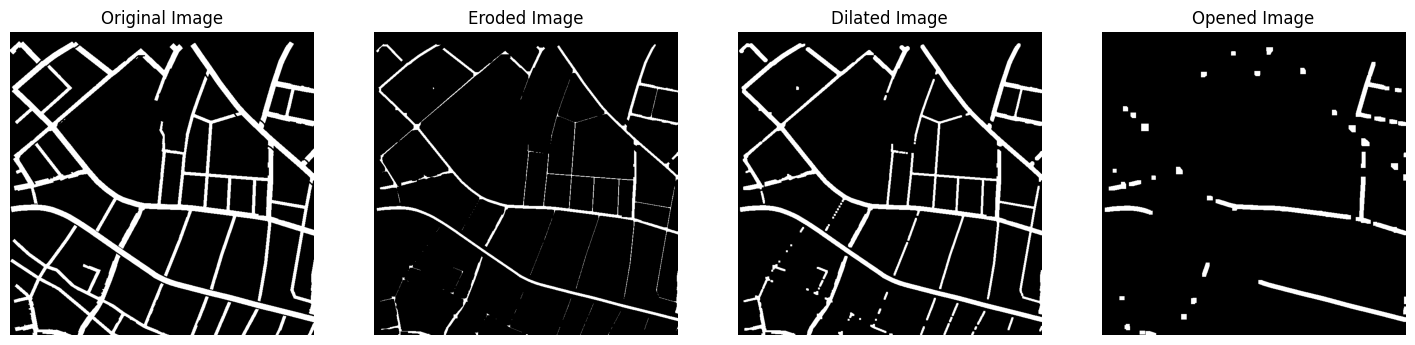

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_and_display_image(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Threshold the image to isolate lines
    _, thresholded = cv2.threshold(img, 199, 255, cv2.THRESH_BINARY)
    
    # Morphological operation: Erosion to thin the lines
    ero_kernel = np.ones((4,4), np.uint8)  # You can adjust the kernel size
    eroded = cv2.erode(thresholded, ero_kernel, iterations=2)
    
    # Morphological operation: Dilation to expand the lines after erosion
    dil_kernel = np.ones((3,3), np.uint8) 
    dilated = cv2.dilate(eroded, dil_kernel, iterations=2)

    kernel = np.ones((10,10), np.uint8) 
    # Optional: Opening to remove small fragments
    opened = cv2.morphologyEx(dilated, cv2.MORPH_OPEN, kernel)
    
    # Display the original and processed images
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 4, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.imshow(eroded, cmap='gray')
    plt.title('Eroded Image')
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.imshow(dilated, cmap='gray')
    plt.title('Dilated Image')
    plt.axis('off')
    
    plt.subplot(1, 4, 4)
    plt.imshow(opened, cmap='gray')
    plt.title('Opened Image')
    plt.axis('off')
    plt.show()

# Example usage:
image_path = '/data/jd_data/fast-DiT/utils/process1.png'  # Replace with the path to your image
process_and_display_image(image_path)


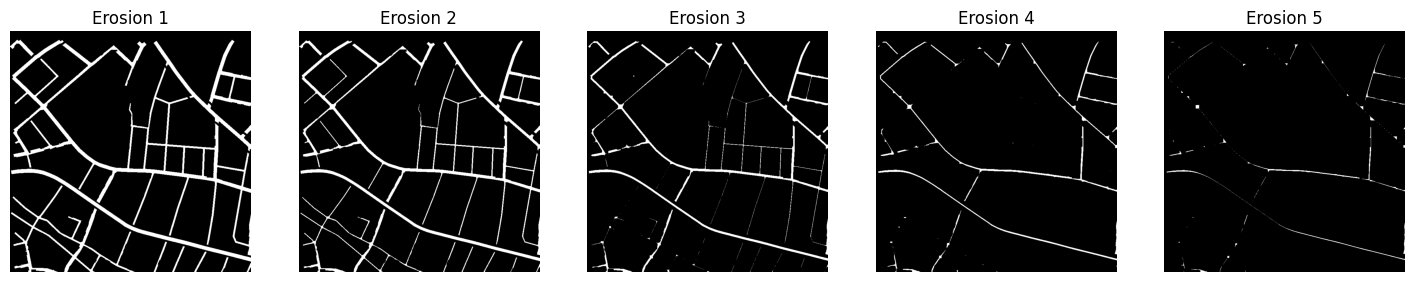

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def test_erosion(image_path, kernel_size, num_iterations):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Threshold the image to create a binary image
    _, img_binary = cv2.threshold(img, 199, 255, cv2.THRESH_BINARY)
    
    # Create a structuring element (kernel)
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    
    # Perform erosion and display each step
    plt.figure(figsize=(18, 6))
    for i in range(num_iterations):
        # Apply erosion
        img_erosion = cv2.erode(img_binary, kernel, iterations=i+1)
        
        # Display results
        plt.subplot(1, num_iterations, i+1)
        plt.imshow(img_erosion, cmap='gray')
        plt.title(f'Erosion {i+1}')
        plt.axis('off')
    
    plt.show()

# Example usage:
image_path = '/data/jd_data/fast-DiT/utils/process1.png'   # Replace with the path to your image
kernel_size = 3  # Kernel size of 3x3
num_iterations = 5  # Number of erosion iterations
test_erosion(image_path, kernel_size, num_iterations)

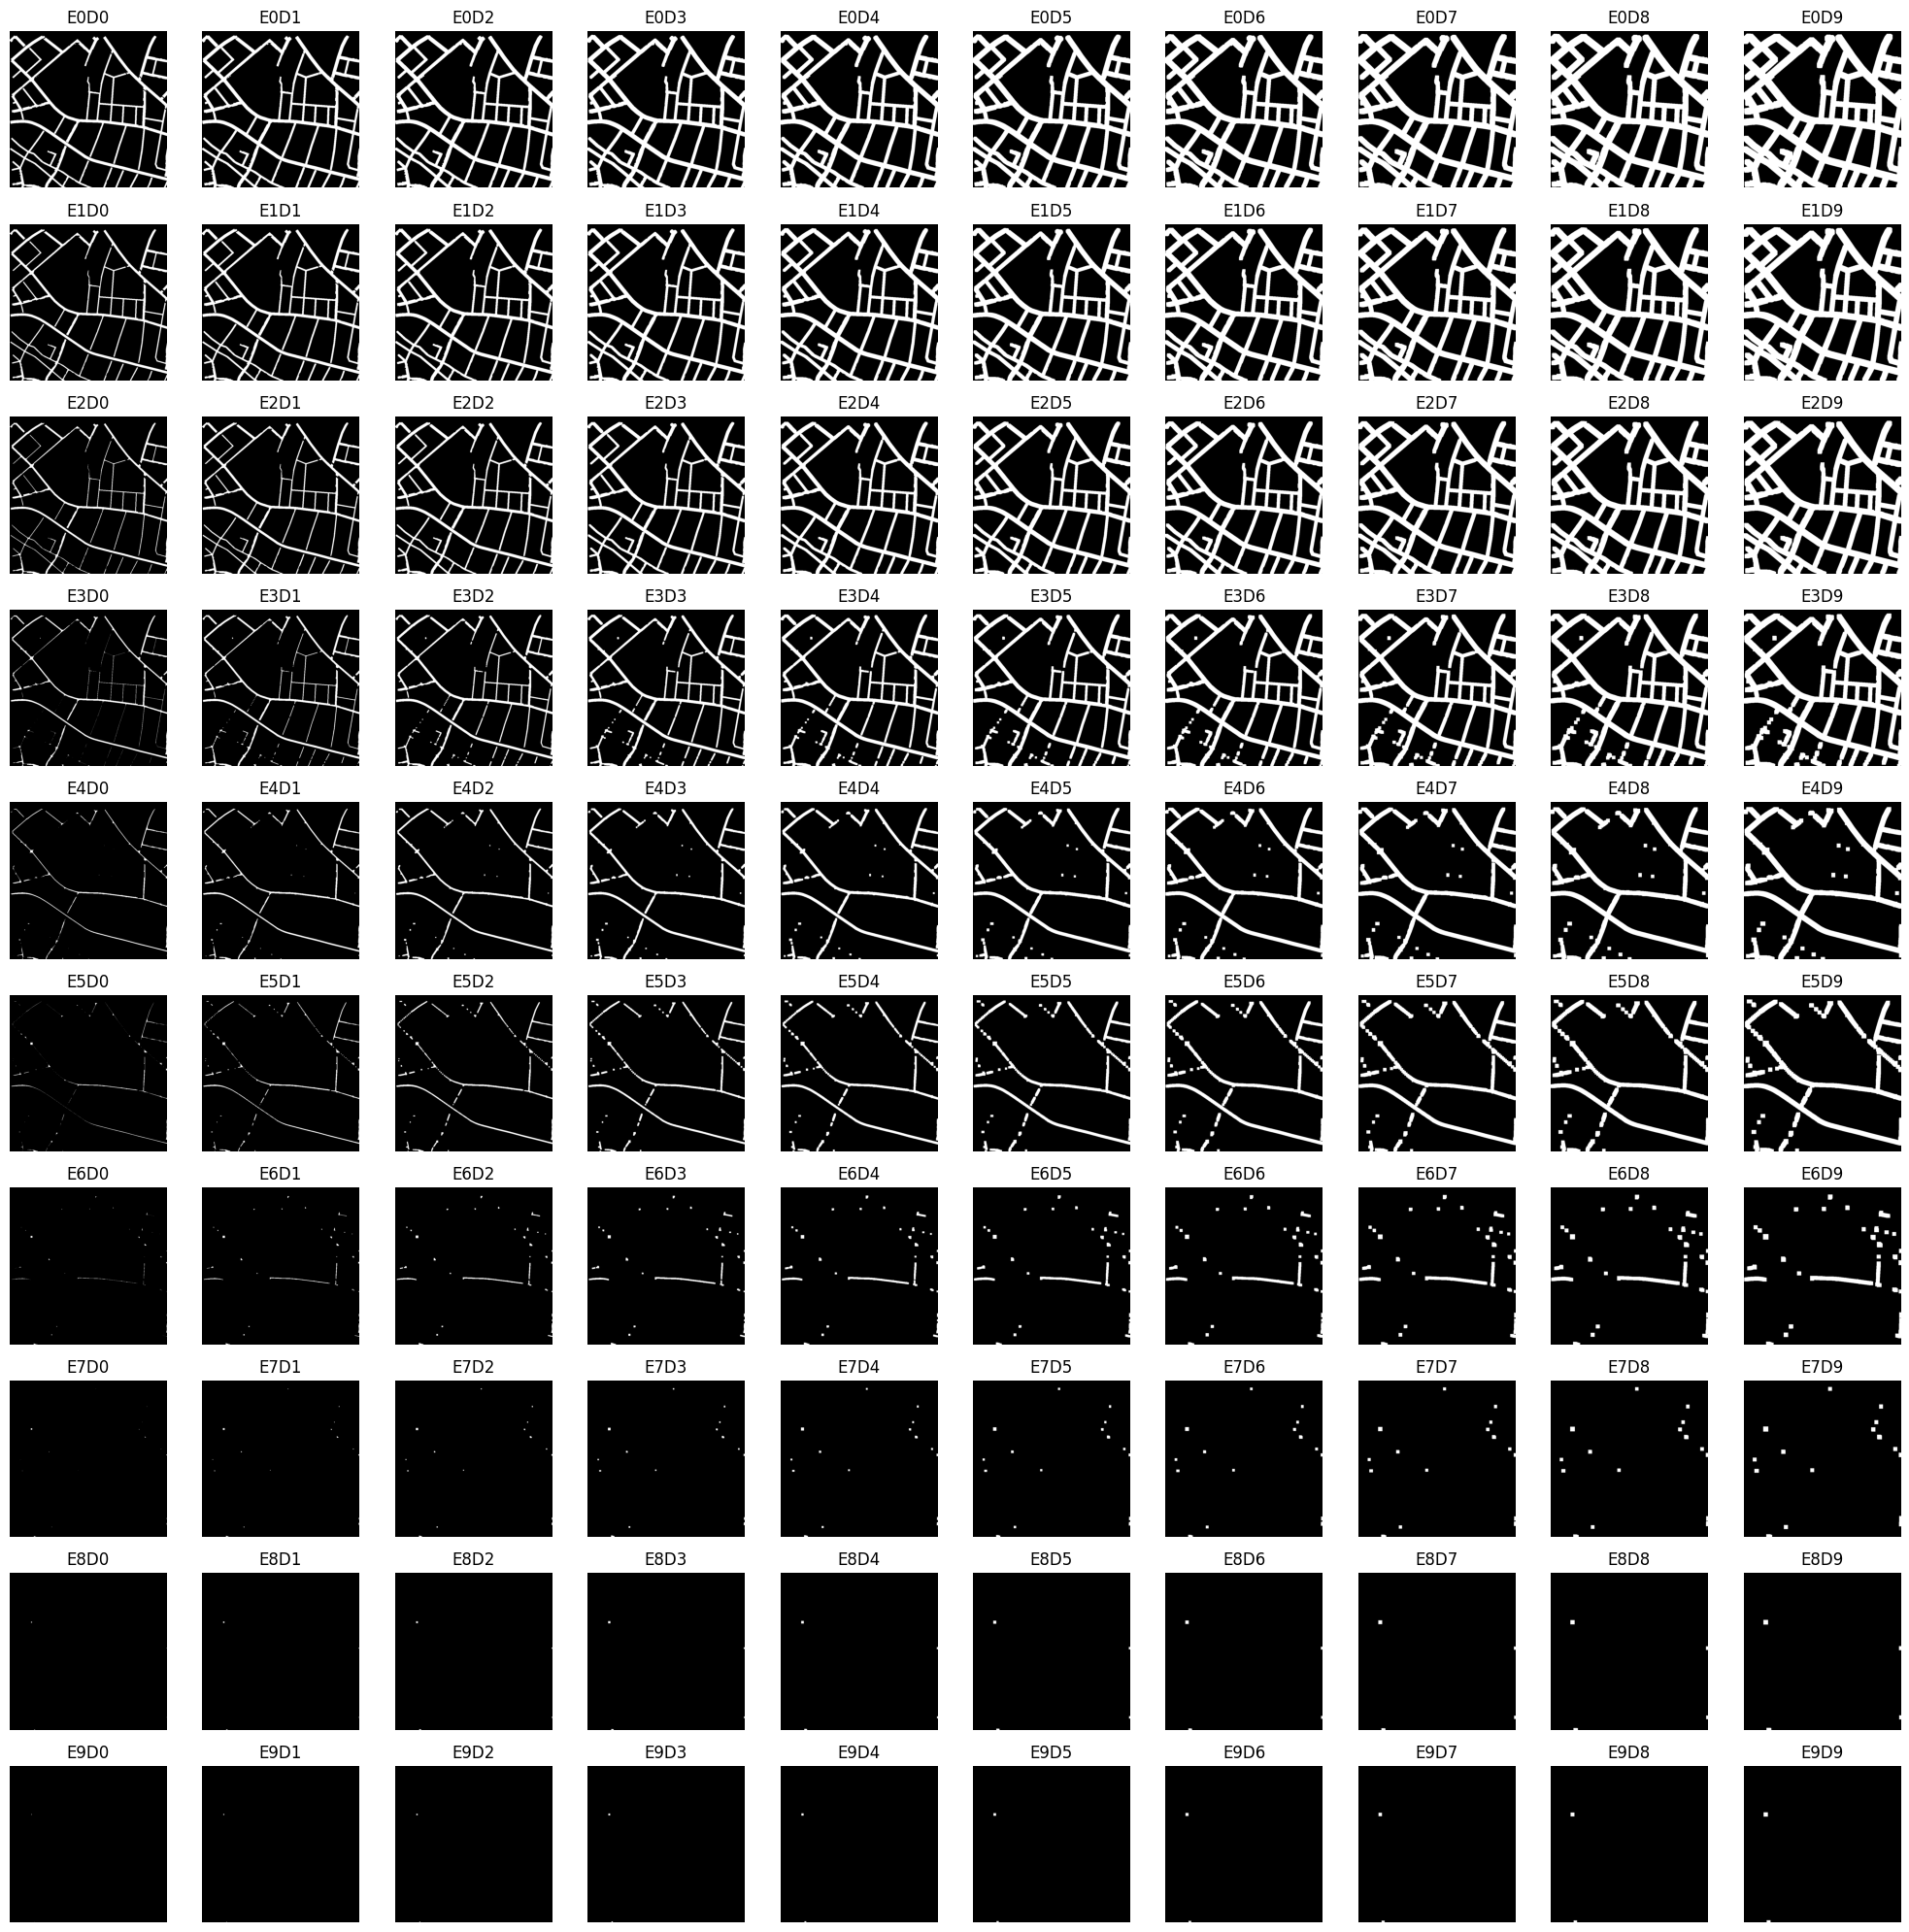

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image_grid(image_path, erosion_kernel_size, dilation_kernel_size):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Threshold the image to create a binary image
    _, img_binary = cv2.threshold(img, 199, 255, cv2.THRESH_BINARY)
    
    # Create structuring elements (kernels)
    erosion_kernel = np.ones((erosion_kernel_size, erosion_kernel_size), np.uint8)
    dilation_kernel = np.ones((dilation_kernel_size, dilation_kernel_size), np.uint8)
    
    # Prepare the figure for a 10x10 grid
    plt.figure(figsize=(20, 20))
    
    # Iterate over each subplot position
    for m in range(10):  # Erosion iterations
        for n in range(10):  # Dilation iterations
            # Perform m rounds of erosion
            if m == 0:
                eroded_img = img_binary  # No erosion if m is 0
            else:
                eroded_img = cv2.erode(img_binary, erosion_kernel, iterations=m)
            
            # Perform n rounds of dilation on the eroded image
            if n == 0:
                dilated_img = eroded_img  # No dilation if n is 0
            else:
                dilated_img = cv2.dilate(eroded_img, dilation_kernel, iterations=n)
            
            # Display the processed image in the grid
            ax = plt.subplot(10, 10, m * 10 + n + 1)
            ax.imshow(dilated_img, cmap='gray')
            ax.set_title(f"E{m}D{n}")
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage:
image_path = '/data/jd_data/fast-DiT/utils/process1.png'  # Replace with the path to your image
erosion_kernel_size = 3  # Kernel size for erosion
dilation_kernel_size = 3  # Kernel size for dilation
process_image_grid(image_path, erosion_kernel_size, dilation_kernel_size)


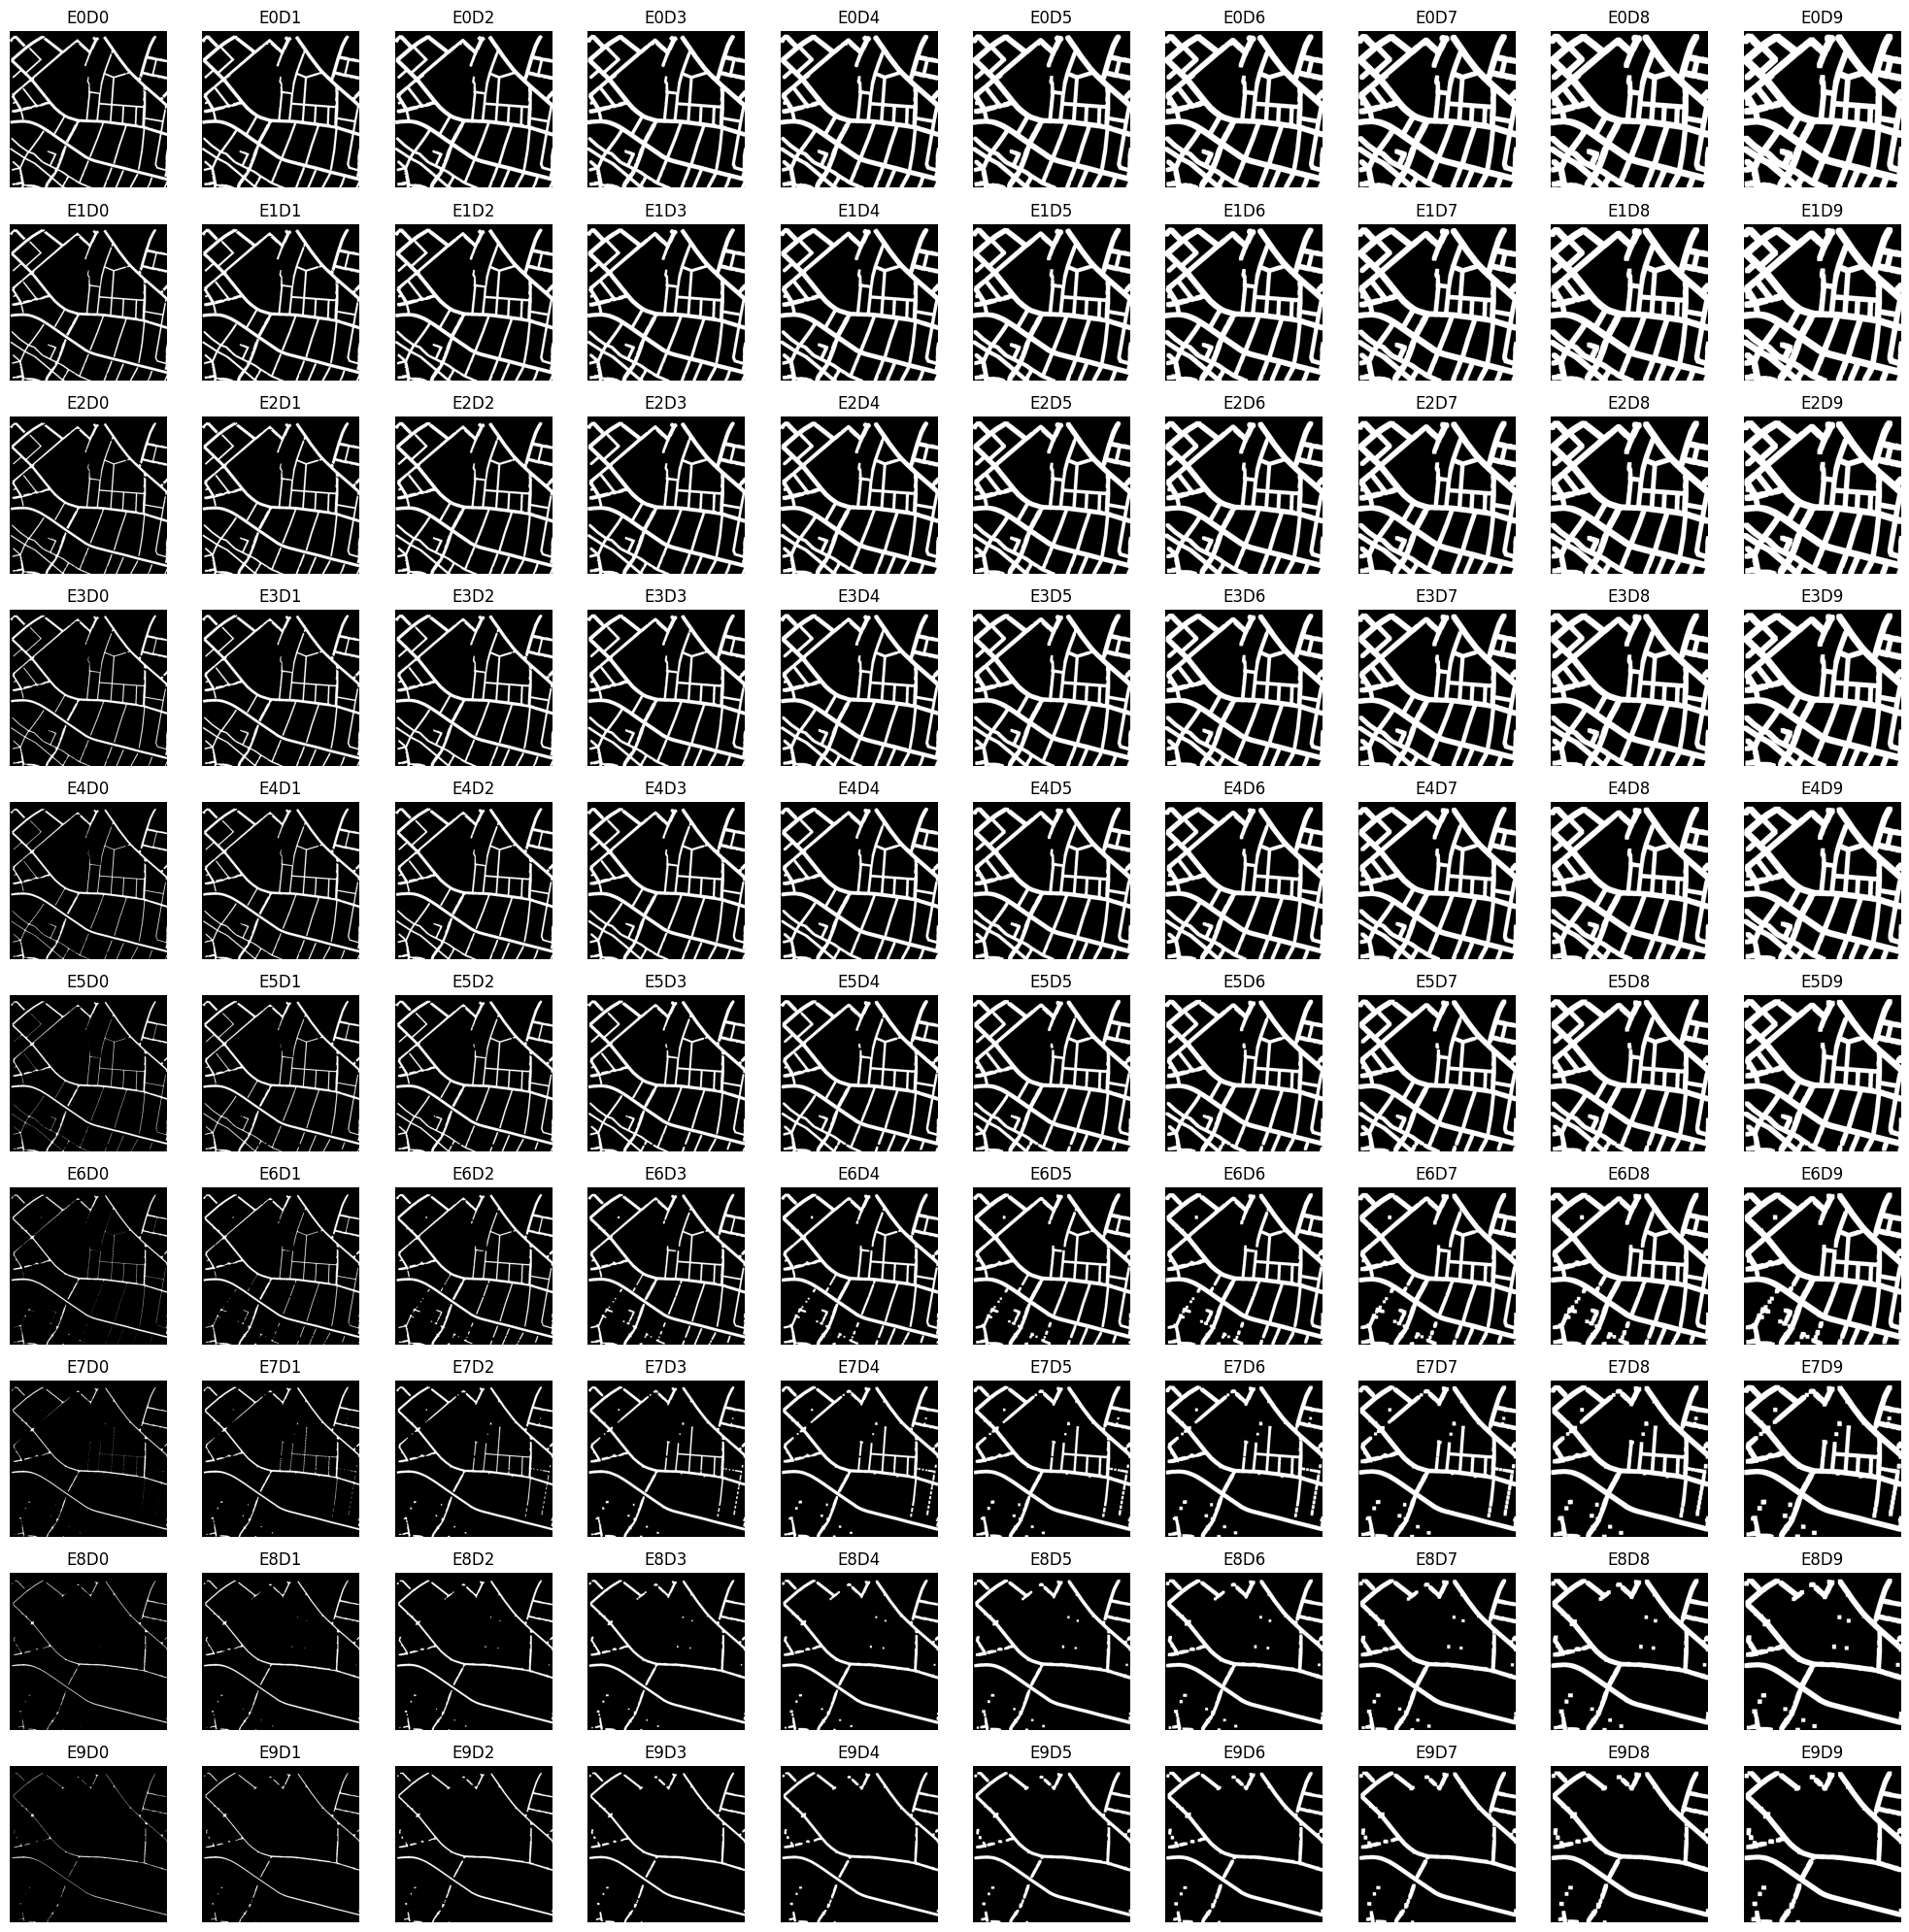

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image_grid(image_path, erosion_kernel_size, dilation_kernel_size):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Threshold the image to create a binary image
    _, img_binary = cv2.threshold(img, 199, 255, cv2.THRESH_BINARY)
    
    # Create structuring elements (kernels)
    erosion_kernel = np.ones((erosion_kernel_size, erosion_kernel_size), np.uint8)
    dilation_kernel = np.ones((dilation_kernel_size, dilation_kernel_size), np.uint8)
    
    # Prepare the figure for a 10x10 grid
    plt.figure(figsize=(20, 20))
    
    # Iterate over each subplot position
    for m in range(10):  # Erosion iterations
        for n in range(10):  # Dilation iterations
            # Perform m rounds of erosion
            if m == 0:
                eroded_img = img_binary  # No erosion if m is 0
            else:
                eroded_img = cv2.erode(img_binary, erosion_kernel, iterations=m)
            
            # Perform n rounds of dilation on the eroded image
            if n == 0:
                dilated_img = eroded_img  # No dilation if n is 0
            else:
                dilated_img = cv2.dilate(eroded_img, dilation_kernel, iterations=n)
            
            # Display the processed image in the grid
            ax = plt.subplot(10, 10, m * 10 + n + 1)
            ax.imshow(dilated_img, cmap='gray')
            ax.set_title(f"E{m}D{n}")
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage:
image_path = '/data/jd_data/fast-DiT/utils/process1.png'  # Replace with the path to your image
erosion_kernel_size = 2  # Kernel size for erosion
dilation_kernel_size = 3  # Kernel size for dilation
process_image_grid(image_path, erosion_kernel_size, dilation_kernel_size)


In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def process_and_save_grid_images(image_path, output_directory):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Threshold the image to create a binary image
    _, img_binary = cv2.threshold(img, 199, 255, cv2.THRESH_BINARY)
    
    # Ensure the output directory exists
    os.makedirs(output_directory, exist_ok=True)
    
    # Loop through different kernel sizes for erosion and dilation
    for x in range(2, 11):  # Erosion kernel sizes from 2 to 10
        for y in range(2, 11):  # Dilation kernel sizes from 2 to 10
            # Create structuring elements (kernels)
            erosion_kernel = np.ones((x, x), np.uint8)
            dilation_kernel = np.ones((y, y), np.uint8)
            
            # Set up the plot for a 10x10 grid
            fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))
            
            for m in range(10):  # Erosion iterations
                for n in range(10):  # Dilation iterations
                    # Perform erosion
                    if m == 0:
                        eroded_img = img_binary
                    else:
                        eroded_img = cv2.erode(img_binary, erosion_kernel, iterations=m)
                    
                    # Perform dilation
                    if n == 0:
                        dilated_img = eroded_img
                    else:
                        dilated_img = cv2.dilate(eroded_img, dilation_kernel, iterations=n)
                    
                    # Plot the processed image in the grid
                    ax = axes[m, n]
                    ax.imshow(dilated_img, cmap='gray')
                    ax.set_title(f"E{m}D{n}", fontsize=8)
                    ax.axis('off')
            
            # Save the figure
            plt.tight_layout()
            save_path = os.path.join(output_directory, f'result_{x}_{y}.png')
            plt.savefig(save_path)
            plt.close(fig)  # Close the plot to free up memory

# Example usage:
image_path = '/data/jd_data/fast-DiT/utils/process1.png'  # Replace with the path to your image
output_directory = '/data/jd_data/fast-DiT/utils/test_output'  # Set the output directory for saving the images
process_and_save_grid_images(image_path, output_directory)


# Another test

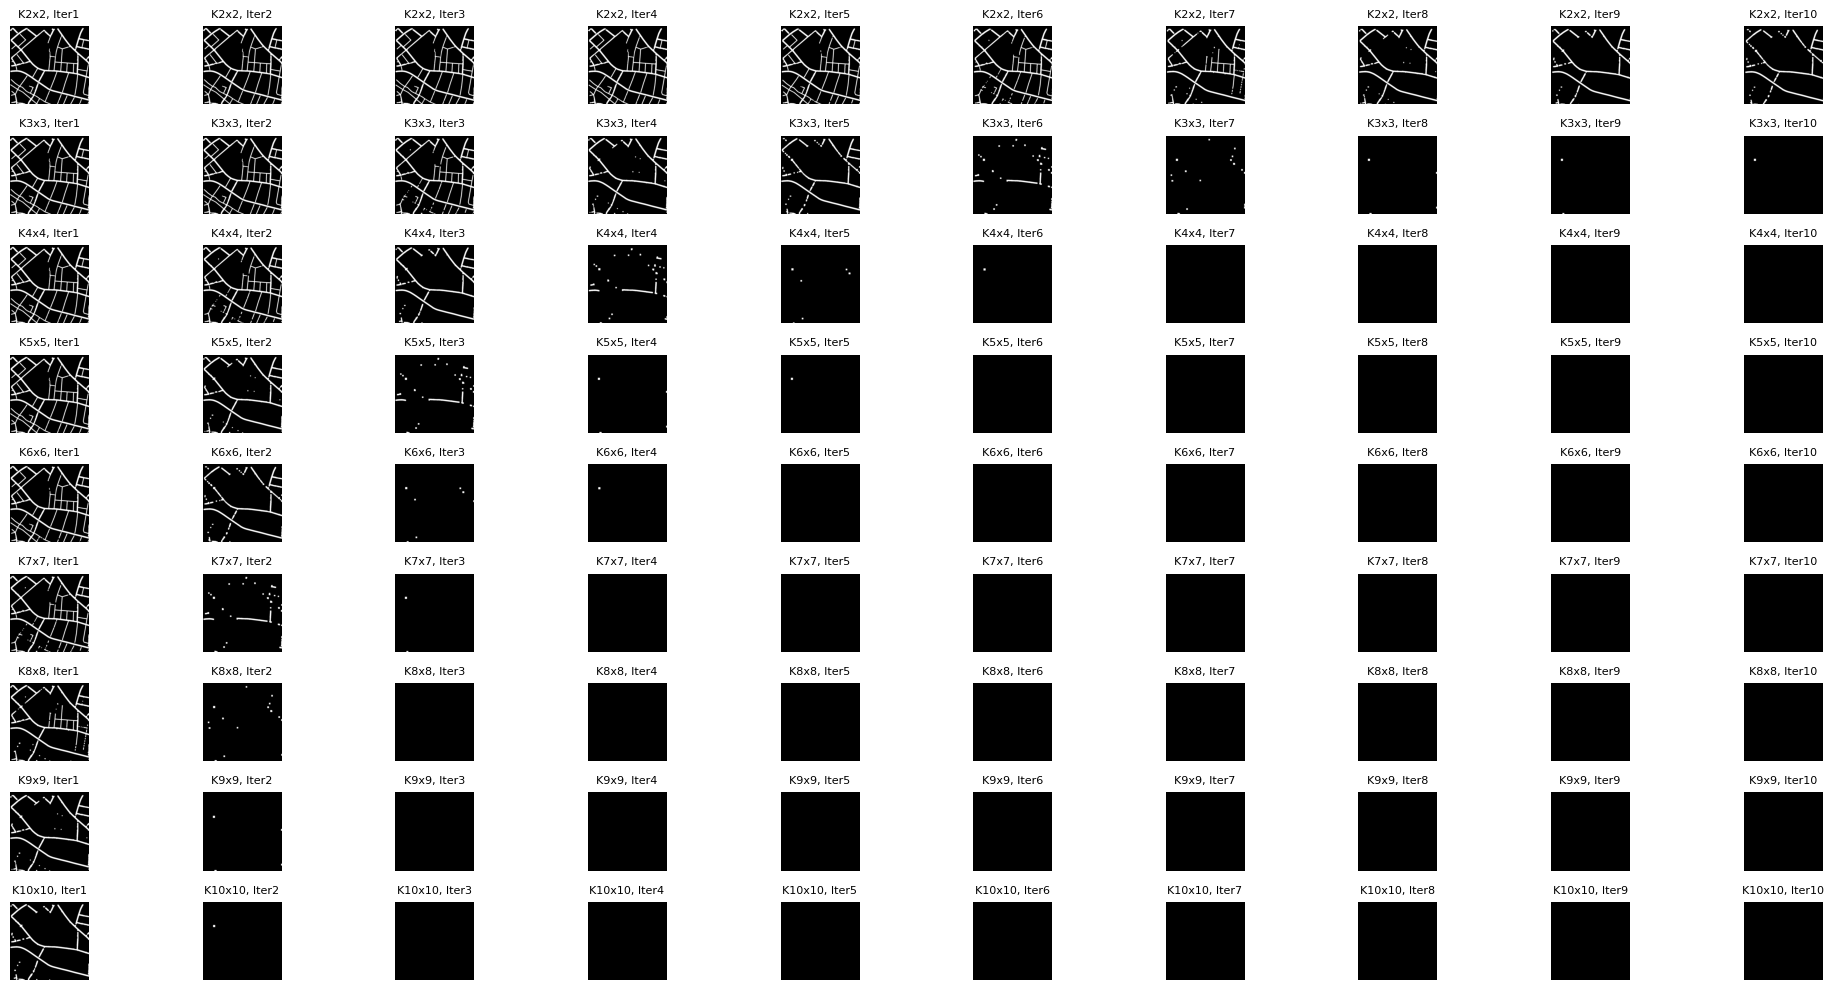

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def test_opening(image_path, max_kernel_size, max_iterations):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Threshold the image to create a binary image
    _, img_binary = cv2.threshold(img, 199, 255, cv2.THRESH_BINARY)
    
    # Set up the plot for a grid
    num_tests = max_kernel_size - 1
    fig, axes = plt.subplots(nrows=num_tests, ncols=max_iterations, figsize=(20, 10))

    for i, kernel_size in enumerate(range(2, max_kernel_size+1)):  # Start from 2x2 to max_kernel_size x max_kernel_size
        for j in range(1, max_iterations+1):
            kernel = np.ones((kernel_size, kernel_size), np.uint8)
            
            # Perform opening
            opened_img = cv2.morphologyEx(img_binary, cv2.MORPH_OPEN, kernel, iterations=j)
            
            # Plot the processed image in the grid
            ax = axes[i, j-1]
            ax.imshow(opened_img, cmap='gray')
            ax.set_title(f"K{kernel_size}x{kernel_size}, Iter{j}", fontsize=8)
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage:
image_path = '/data/jd_data/fast-DiT/utils/process1.png'   # Replace with the path to your image
max_kernel_size = 10  # Maximum kernel size
max_iterations = 10  # Maximum number of iterations for opening
test_opening(image_path, max_kernel_size, max_iterations)


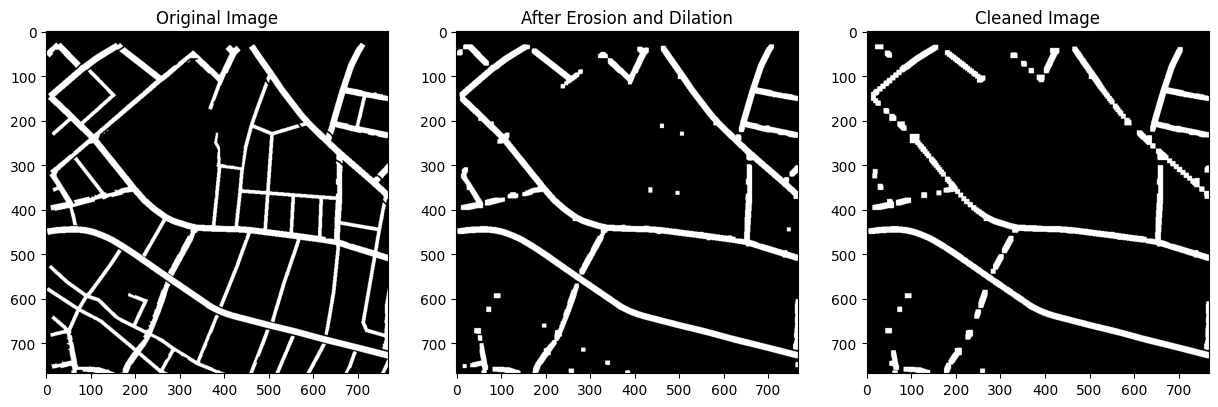

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the binary image
image = cv2.imread('/data/jd_data/fast-DiT/utils/process1.png', cv2.IMREAD_GRAYSCALE)

# Invert the image if needed (if lines are black and background is white)
# image = cv2.bitwise_not(image)

# Define the structuring element for erosion and dilation
kernel_9 = np.ones((9, 9), np.uint8)

# Perform erosion
eroded_image = cv2.erode(image, kernel_9, iterations=1)

# Perform dilation
dilated_image = cv2.dilate(eroded_image, kernel_9, iterations=1)

# Define the structuring element for noise removal
kernel_3 = np.ones((11, 11), np.uint8)

# Perform morphological opening to remove small noise points
cleaned_image = cv2.morphologyEx(dilated_image, cv2.MORPH_OPEN, kernel_3)

# Display the original and processed images
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('After Erosion and Dilation')
plt.imshow(dilated_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Cleaned Image')
plt.imshow(cleaned_image, cmap='gray')

plt.show()

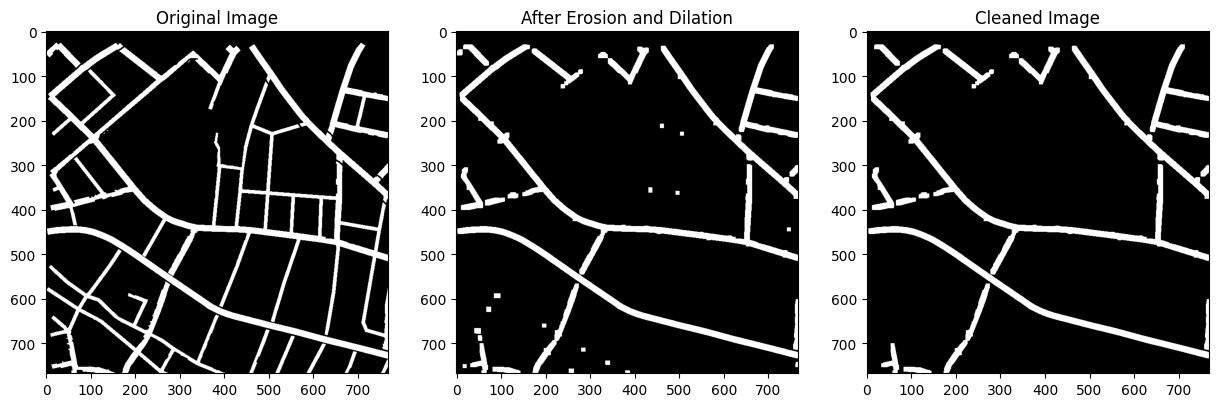

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the binary image
image = cv2.imread('/data/jd_data/fast-DiT/utils/process1.png', cv2.IMREAD_GRAYSCALE)

# Invert the image if needed (if lines are black and background is white)
# image = cv2.bitwise_not(image)

# Define the structuring element for erosion and dilation
kernel_9 = np.ones((9, 9), np.uint8)

# Perform erosion
eroded_image = cv2.erode(image, kernel_9, iterations=1)

# Perform dilation
dilated_image = cv2.dilate(eroded_image, kernel_9, iterations=1)

# Find all connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dilated_image, connectivity=8)

# Set the threshold for the minimum number of pixels in a component
threshold = 200

# Create a copy of the image to remove small components
cleaned_image = np.zeros_like(dilated_image)

for label in range(1, num_labels):
    if stats[label, cv2.CC_STAT_AREA] >= threshold:
        cleaned_image[labels == label] = 255

# Display the original and processed images
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('After Erosion and Dilation')
plt.imshow(dilated_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Cleaned Image')
plt.imshow(cleaned_image, cmap='gray')

plt.show()
